In [11]:
from sklearn.datasets import fetch_mldata

In [33]:
import sys,os,os.path
os.environ['HTTP_PROXY']="localhost:3128"
os.environ['HTTPS_PROXY']="localhost:3128"
mnist = fetch_mldata('MNIST original') # 下载所花的时间会比较久

In [13]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [41]:
# data就是数据本身，target就是标签。MNIST数据的话，data就是手写数字图片数据，target就是对应的数字值。
X, y = mnist["data"], mnist["target"]

In [15]:
X.shape # 70000个手写的数字图片数据，每个数据由784个点组成，具体含义看书里面的介绍。

(70000, 784)

In [16]:
y.shape # 每个图片对应的数字值。

(70000,)

In [17]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [18]:
some_digit = X[36000] # 第36000个数字。
some_digit

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  86, 131, 225, 225, 225,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [19]:
some_digit_image = some_digit.reshape(28, 28)
some_digit_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,  86, 131, 225, 225, 225,   0,   0,
          0,   0],
       [  

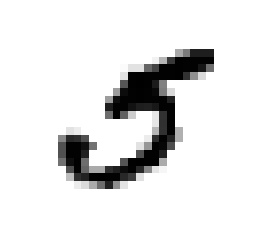

In [20]:
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show() # 显示出这第36000个数字的图片，可以看到是手写的5。

In [21]:
y[36000] # 标签（target）也证明了是5。

5.0

In [42]:
# 分割为训练集（X），和验证集（Y），训练集包含6万个数据，剩下的归验证集。
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [27]:
import numpy as np
shuffle_index = np.random.permutation(60000) # 打乱数据顺序，可以通过打乱原有的索引顺序开始。这里创建一个乱序的索引。

In [28]:
shuffle_index

array([ 4037, 53635, 51981, ..., 53813, 57933, 53783])

In [29]:
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index] # 打乱数据顺序后的数组。这里面Python的语法值得学习。

In [30]:
y_train_5 = (y_train == 5) # 找到训练集里面数字为5的元素
y_train_5

array([False, False, False, ..., False, False, False], dtype=bool)

In [32]:
y_test_5 = (y_test == 5) # 同理，找到测试集里数字为5的元素
y_test_5

array([False, False, False, ..., False, False, False], dtype=bool)

In [34]:
# Stochastic Gradient Descent classifier，由sklearn默认提供，是一种比较简单的classifier
from sklearn.linear_model import SGDClassifier

In [35]:
sgd_clf = SGDClassifier(random_state = 42)

In [37]:
sgd_clf.fit(X_train, y_train_5) # 训练算法，让它能够识别数字5

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [40]:
sgd_clf.predict([some_digit]) # 识别一下上面的这个数字5的数据，就是some_digit，如果predict的结果是True，就说明识别正确。

array([ True], dtype=bool)